# PyTorch Workflow
lets explore an example of pytorch workflow

In [ ]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}
what_were_covering



{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn #nn contains all of pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

#check pytorch version
torch.__version__

## 1. Data (prepare and loading)

data can be almost anything... in machine learning.

* excel spreadsheet
* images of any kind
* video (youtube has lots of data..)
* audio like songs or podcasts
* dna
* text

machine learning is a game of two parts:
1. get data into a numeric representation
2. build a model to learn patterns in that numerical representation

to showcase this, let's create some *known* data using the linear regression formula

we'll use a linear regressisno formula to make a straight line with *known* **parameters**

In [ ]:
# create *known* parameters
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1) #unsqueeze adds an extra dimension so it looks like 1D
y = weight * X + bias

X[:10], y[:10]

In [ ]:
len(X), len(y)

### spliting data into training and test sets (one of the most important concepts in machine learning in general)

let's create a training and test set with our data.

In [ ]:
# create a train/test split

train_split = int(0.8 * len(X)) #40
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

time to visualize our data

In [ ]:
import matplotlib.pyplot as plt
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  plots training data, test data and compare predictions.
  """

  plt.figure(figsize = (10,7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #plot testing data
  plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")

  #are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label = "predictions")

  #show the legend
  plt.legend(prop={"size": 14});

In [ ]:
plot_predictions();

## 2. build model

first pytorch model

what our model does?
* start with random values (weight and bias)
* look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

how does it do so?
through two main algorithms:
1. gradient descent
2. backpropagation

In [ ]:
from torch import nn
#create linear regression model class

class LinearRegressionModel(nn.Module):  # <- almost everything in PyTorch inherites from this nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad= True,
                                         dtype=torch.float))

  #forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias #this is the linear regression formula



### pytorch model building essentials
* torch.nn - contains all of the building for computationsal graphs ( a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch,nn will set these for us
* torch.nn.Module - the base for all neural network should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.optim - this where optimizers in PyTorch live, they will help woth gradient descent
* def forward() - all nn.Module() subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### checking the contents of our PyTorch model

now we've created a model, let's see whats inside..

so we can check our model parameters or what's insisde our model using `.parameters()`

In [ ]:
# create a random seed

torch.manual_seed(42)

#create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

#check our parameters
list(model_0.parameters())

In [ ]:
model_0.state_dict()

In [ ]:
weight, bias

### making prediction using `torch.inference_mode()`

to check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

when we pass data through our model, it's going to run it through the `forward()` method.

In [ ]:
X_test, y_test
#this is the ideal form that it should be trained into

In [ ]:
# make predicitons with model
with torch.inference_mode():
  y_preds = model_0(X_test)

#you can also do something similar with torch.no_grad(), however, inference_moed() is preferred
#with torch.no_grad():
# y_preds = model_0(X_test)

y_preds

In [ ]:
y_test

In [ ]:
plot_predictions(predictions = y_preds)

## 3. train model

the whole idea of training is for a model to move from some *unkown* parameters (these may be random) to *known* parameters

or in other words from a poor represenation of the data to a better representation of the data

one way to measure how poor or how wrong the model's predictions are is to use a loss function

* note: loss function may also be called cost function or criterion in different areas. for our case, we're going to refer to it as a loss function.

things we need to train:

* **loss function: ** a function to measure how wrong your model's predictions are to the ideal outputs. the lower the better

* **optimizer: ** takes into account the loss of a model and adjusts the model's parameters (e.g weight & bias) to improve the loss function.

     - inside the optimizer you'll often have to set two parameters:
     * `params` - the model parameters you'd like to optimeize, for example `params=model_0.paramters()`
     * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes)

and specifically for pytorch, we need:
* a train loop
* a test loop


In [ ]:
list(model_0.parameters())

In [ ]:
#check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

In [ ]:
# setting up a loss function
loss_fn = nn.L1Loss()

# setting up an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) # lr = learning rate = possibly the mosts important hyperparameter you can set

### building a training loop in PyTorch

a couple of things we need in a training loop:
0. loop through data
1. forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propogations
2. calculate the loss (compare forwarad pass predictions to ground truth labels)
3. optimizer zero grad
4. loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (backpropogation)
5. optimizer step - use the optimizer to adjust our model's paramters to try and improve the loss (gradient descent)
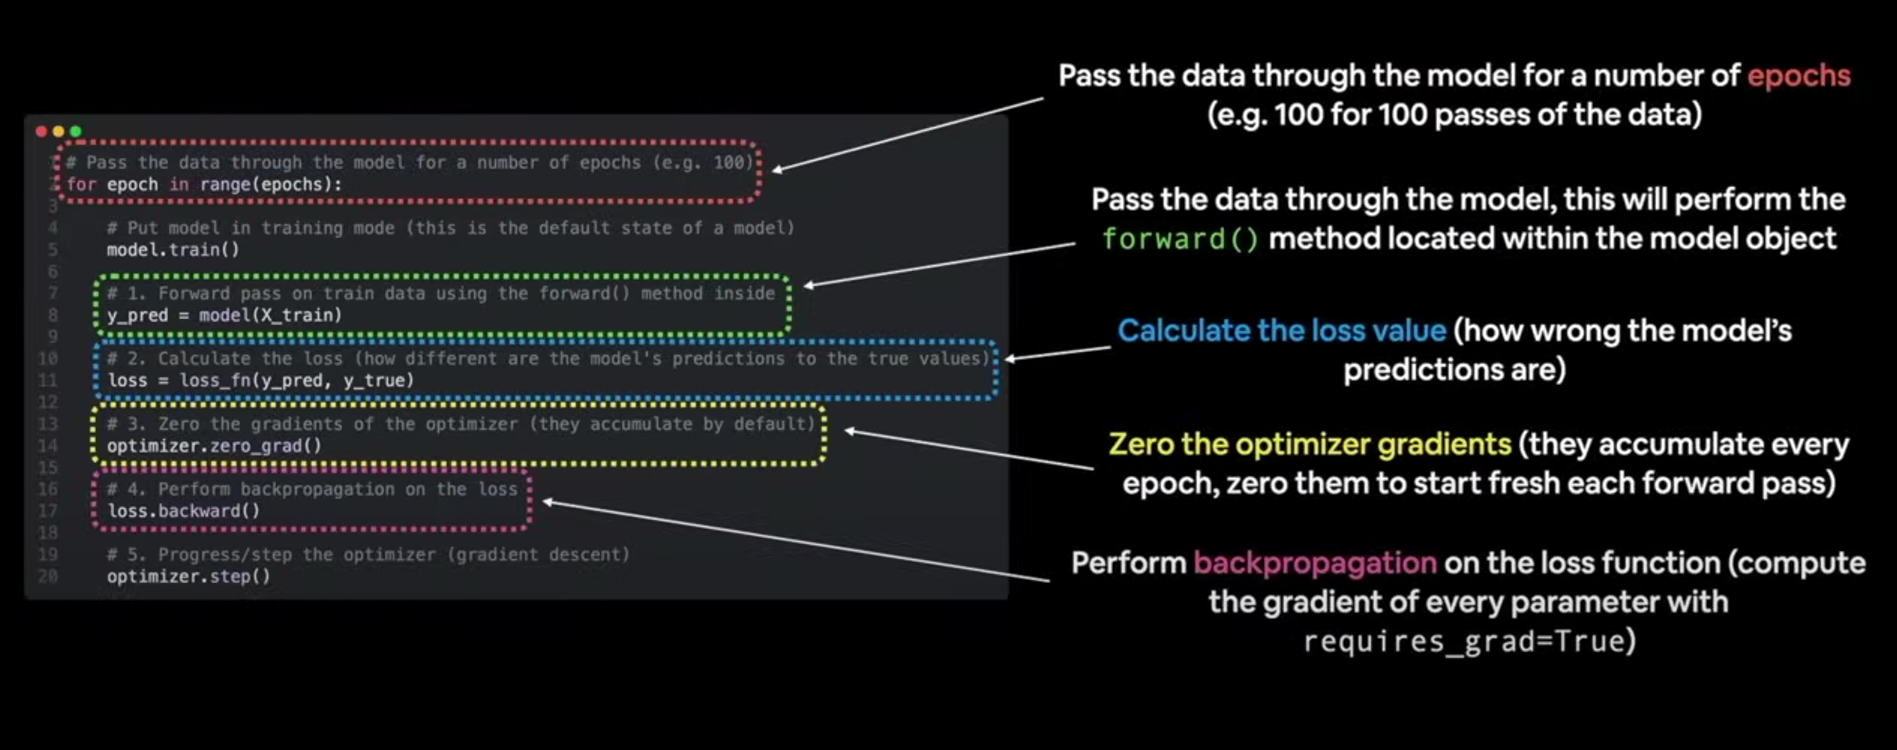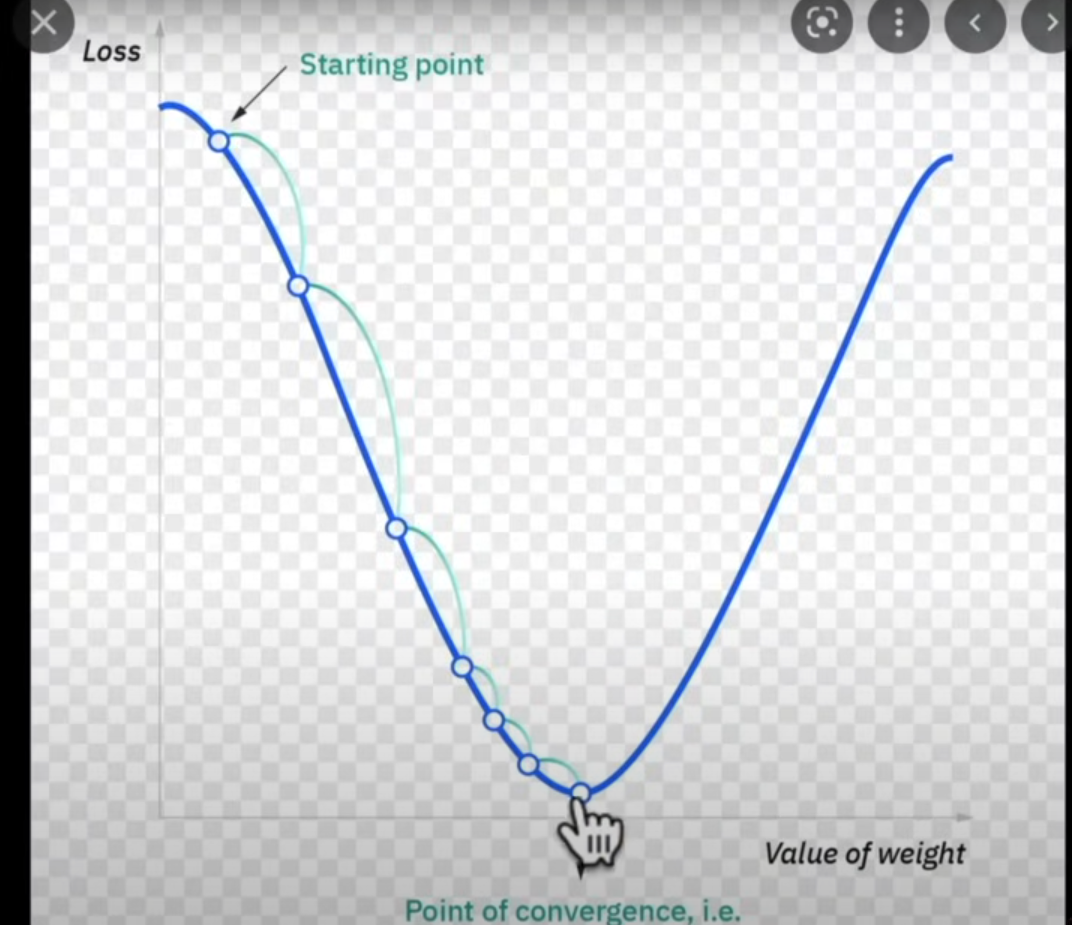

In [ ]:
#an epoch is one loop through the data (this is a hyperparameter because we have set it ourselves)
epochs = 200

#track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() #train mode in PyTorch sets all parameters that require gradients to require gradients

  #1. forward pass
  y_pred = model_0(X_train)

  #2. calculate the loss
  loss = loss_fn(y_pred, y_train)
  #print(f"loss: {loss}")

  #3. optimizer zero grad
  optimizer.zero_grad()

  #4. perform backpropogation on the loss with respect to the parameters of the model
  loss.backward()

  #5. step the gradient (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumlate through the loop so... we have to zero them above in step 3 for the next iteration


  ### Testing

  model_0.eval() #turns off gradient tracking (turns off different settings int the model which aren't needed for evaluation/testing)
  with torch.inference_mode(): #turns off gradient tracking & a couple of more things behind the scenes
  #with torch.no_grad(): #you may also use this instead of inference mode
    #1. do the forward pass
    test_pred = model_0(X_test)

    #2. calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  #print out whats happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"epoch: {epoch} | test: {loss} | test loss:{test_loss}")
    #print out model state dict()
    print(model_0.state_dict())

In [ ]:
#the graph cannot be plotted with tensor values so we convert it into arrays using numpy
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
model_0.state_dict() #after running the training loop

In [ ]:
model_0.state_dict() #before running the training loop

In [ ]:
weight, bias

In [ ]:
plot_predictions(predictions = y_preds)

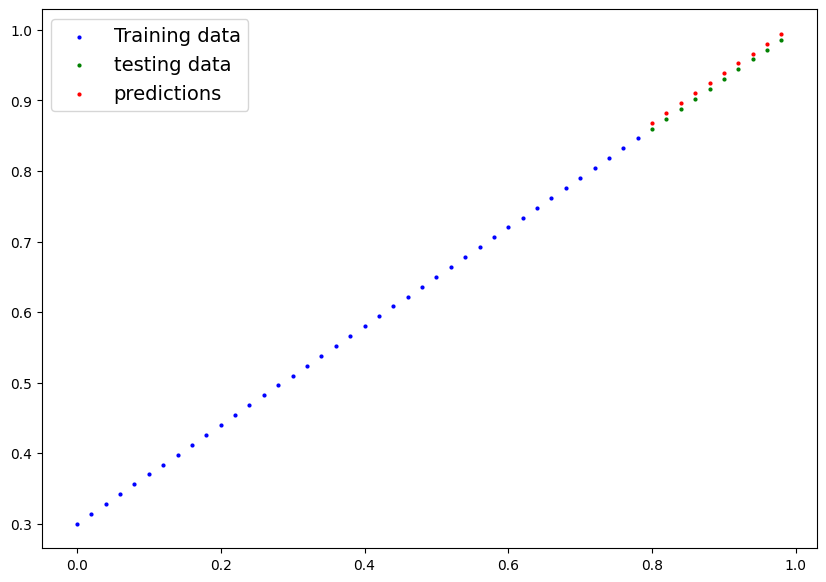

In [ ]:
plot_predictions(predictions = y_preds_new)

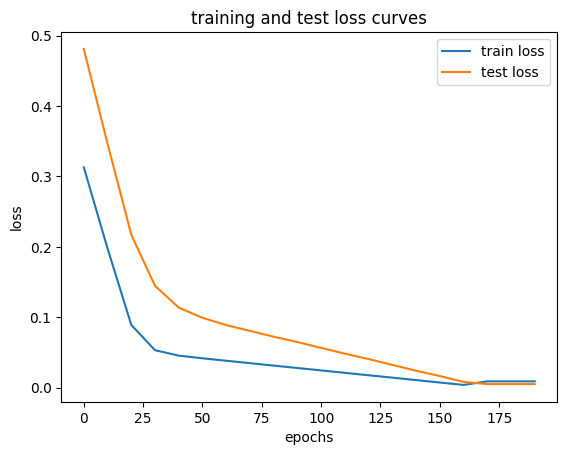

In [ ]:
#plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "train loss")
plt.plot(epoch_count, test_loss_values, label = "test loss")
plt.title("training and test loss curves")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend();

## 4. saving a code in pytorch
there are 3 main methods you should know about for saving and loading models in Pytorch.
1. `torch.save()` - allows you to save a pytorch object in python's pickle format
2. `torch.load()` - allows you to load a saved pytorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#saving our pytorch model
from pathlib import Path #pathlib deals with file paths in a system

#1. create model's directory
MODEL_PATH = Path("models") #creates folder
MODEL_PATH.mkdir(parents = True, exist_ok = True)

#2. create a model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth" # .pth or .pt is the extension that needs to be used for naming
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

#3. save the model state dict

#torch.save(model.state_dict(), PATH)
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Apr 28 06:11 01_pytorch_workflow_model_0.pth


## 5. loading a pytorch model

since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [ ]:
#model = TheModelClass(*args, **kwargs)
#model.load_state_dict(torch.load(PATH))
#model.eval()

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# to load in a saved state_dict we have to instantiate a new instance of our linear regression model

loaded_model_0 = LinearRegressionModel()

#load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. putting it all together

lets go back through the steps above and see it all in one place.

In [ ]:
#import torch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#check pytoch version
torch.__version__

'2.2.1+cu121'

In [ ]:
#setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device: {device}")

using device: cpu


### 6.1 data

In [ ]:
#create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

#create range values
start = 0
end = 1
step = 0.02

#create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(1) #without unsqueeze, errors will pop up into the model
y = weight * X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
#split the data
train_split = int (0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
#plot the predictions
import matplotlib.pyplot as plt
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

  plt.figure(figsize = (10,7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label = "predictions")

  plt.legend(prop={"size": 14});

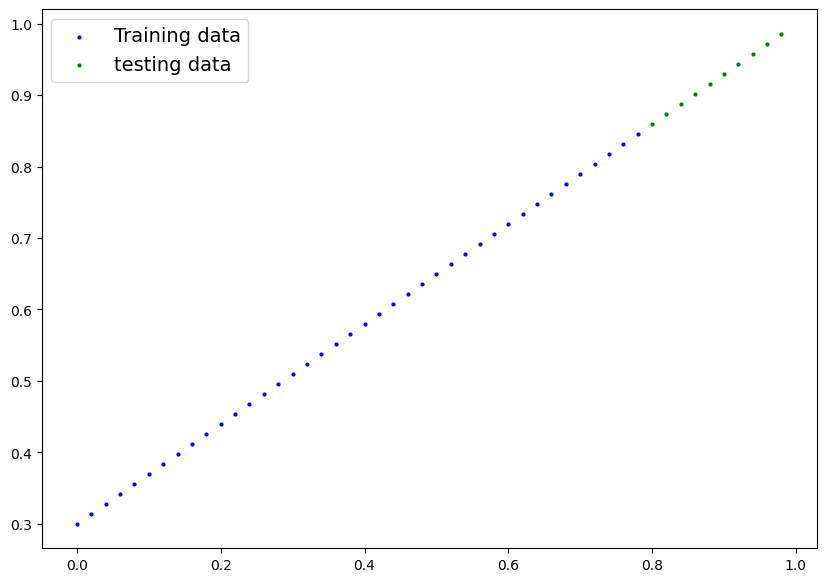

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 building a pytorch linear model

In [ ]:
#create a linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.Linear() for creating the model parameters / also called linear transform probing layer/fully connected layer
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

#set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

### 6.3 training
for training we need a:
  * loss function
  * optimizer
  * training loop
  * testing loop

In [ ]:
#setup loss function
loss_fn = nn.L1Loss() #same as MAE

#setup optimizer
optimizer = torch.optim.SGD(params =model_1.parameters() , #SGD is used for gradient descent
                            lr = 0.01)

In [ ]:
#lets write training loop
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
  model_1.train()

  #1. forward pass
  y_pred = model_1(X_train)

  #2. calculate loss
  loss = loss_fn(y_pred, y_train)

  #3. optimize zero gradient
  optimizer.zero_grad()

  #4. backpropogation
  loss.backward()

  #5. optimizer step
  optimizer.step()

  ###testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  #print out whats happening
  if epoch % 10 == 0:
    print(f"epoch: {epoch} | loss: {loss} | test_loss: {test_loss}" )


epoch: 0 | loss: 0.5551779866218567 | test_loss: 0.5739762187004089
epoch: 10 | loss: 0.4399680495262146 | test_loss: 0.4392663538455963
epoch: 20 | loss: 0.3247582018375397 | test_loss: 0.30455657839775085
epoch: 30 | loss: 0.20954827964305878 | test_loss: 0.16984674334526062
epoch: 40 | loss: 0.09433844685554504 | test_loss: 0.03513689711689949
epoch: 50 | loss: 0.023886386305093765 | test_loss: 0.04784906655550003
epoch: 60 | loss: 0.0199567973613739 | test_loss: 0.04580312222242355
epoch: 70 | loss: 0.016517987474799156 | test_loss: 0.0375305712223053
epoch: 80 | loss: 0.013089170679450035 | test_loss: 0.029944902285933495
epoch: 90 | loss: 0.009653178043663502 | test_loss: 0.02167237363755703
epoch: 100 | loss: 0.006215679459273815 | test_loss: 0.014086711220443249
epoch: 110 | loss: 0.002787243574857712 | test_loss: 0.005814164876937866
epoch: 120 | loss: 0.0012645035749301314 | test_loss: 0.013801807537674904
epoch: 130 | loss: 0.0012645035749301314 | test_loss: 0.01380180753767

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
weight, bias

(0.7, 0.3)

### 6.4 making and evaluating predictions

In [ ]:
# turn model into evaluation mode
model_1.eval()

#make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

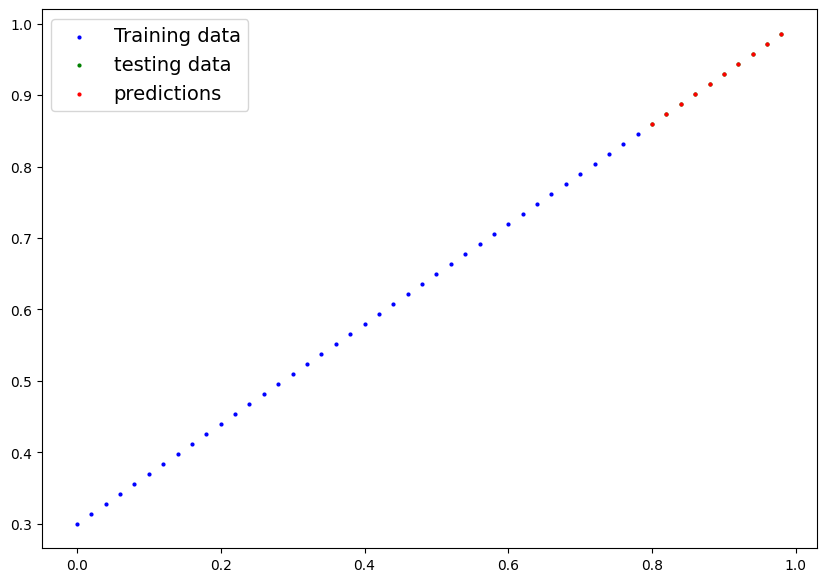

In [ ]:
#check our model's predictions visually

plot_predictions(predictions = y_preds)

### 6.5 saving and loading a trained model

In [ ]:
from pathlib import Path

#1. create model's directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok= True)

#2. create a model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

#3. save the model state dict
print(f"saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(),
           f = MODEL_SAVE_PATH)

saving the model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
#load a pytorch model

#create a new instanc of linear regression model v2
loaded_model_1 = LinearRegressionModelV2()

#load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#put the target model to device
loaded_model_1.to(device)



LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
#evaluate loaded model

loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = model_1(X_test)

loaded_model_1_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])